In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_features.csv')

In [3]:
for entry in ['cp_type', 'cp_time',	'cp_dose']:
    print(df[entry].value_counts())

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64
48    8250
72    7792
24    7772
Name: cp_time, dtype: int64
D1    12147
D2    11667
Name: cp_dose, dtype: int64


In [4]:
df.shape

(23814, 876)

In [5]:
def dummy_vars(df):
    df.loc[:, 'cp_type'] = df.loc[:, 'cp_type'].map({'trt_cp': 0, 'ctl_vehicle': 1})
    # trt_cp is a control and has no MOA, ctl_vehicle indicates a real test
    df.loc[:, 'cp_dose'] = df.loc[:, 'cp_dose'].map({'D1': 0, 'D2': 1})
    # create columns ['cp_type_24', 'cp_type_48', 'cp_type_72'] which are one hot encoded based on cp_time
    df['cp_type_24'] = df['cp_time'].astype(str) == '24'
    df['cp_type_48'] = df['cp_time'].astype(str) == '48'
    df['cp_type_72'] = df['cp_time'].astype(str) == '72'
    df.drop(columns=['sig_id','cp_time'], inplace = True)
    return df

In [6]:
df = dummy_vars(df)

In [7]:
df.columns

Index(['cp_type', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3', 'g-4', 'g-5', 'g-6',
       'g-7',
       ...
       'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98', 'c-99', 'cp_type_24',
       'cp_type_48', 'cp_type_72'],
      dtype='object', length=877)

In [8]:
#df.loc[:,'c-0':'c-99']#all c categories
df.loc[:,'g-0':'g-771']#all g categories
g_shape = df.loc[:,'g-0':'g-771'].shape
g_len = g_shape[0]*g_shape[1]

In [9]:
g_list = np.array(df.loc[:,'g-0':'g-771']).reshape((g_len))

In [10]:
g_list

array([ 1.062 ,  0.5577, -0.2479, ...,  0.3633, -3.197 ,  2.219 ])

In [11]:
df.loc[:,'g-0':'g-771']

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,...,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968,-0.0224
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,...,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289,-0.2718
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,...,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133,0.7923
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,...,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588,-0.0343
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,...,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000,-0.6269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,...,0.7790,0.5393,0.4112,-0.5059,0.0240,-0.2297,0.7221,0.5099,-0.1423,0.3806
23810,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,...,-0.0858,0.3606,-0.0248,0.0672,-0.5901,-0.1022,0.5247,0.5438,-0.1875,-0.4751
23811,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,...,0.1796,0.3488,0.0927,0.5166,-0.3099,-0.5946,0.9778,0.2326,-0.6191,0.3603
23812,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,...,-0.1410,1.9590,0.8224,1.2500,-3.1930,-2.8720,0.1794,0.3109,-0.3491,-0.4741


In [14]:
g_df = np.array(np.swapaxes((df.loc[:,'g-0':'g-771']),0,1))
g_df

array([[ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598],
       [ 0.5577,  0.4087,  0.5817, ...,  0.3756,  0.2324,  1.024 ],
       [-0.2479,  0.2991,  1.554 , ...,  0.3109,  0.4392, -0.1361],
       ...,
       [ 1.649 , -0.334 ,  0.3143, ...,  0.2326,  0.3109,  0.3633],
       [ 0.2968, -0.3289,  0.8133, ..., -0.6191, -0.3491, -3.197 ],
       [-0.0224, -0.2718,  0.7923, ...,  0.3603, -0.4741,  2.219 ]])

In [15]:
for col in g_df:
    col, lmbda = stats.yeojohnson(col)
g_df = np.swapaxes(g_df, 0, 1)
g_df

array([[ 1.062 ,  0.5577, -0.2479, ...,  1.649 ,  0.2968, -0.0224],
       [ 0.0743,  0.4087,  0.2991, ..., -0.334 , -0.3289, -0.2718],
       [ 0.628 ,  0.5817,  1.554 , ...,  0.3143,  0.8133,  0.7923],
       ...,
       [ 0.3942,  0.3756,  0.3109, ...,  0.2326, -0.6191,  0.3603],
       [ 0.666 ,  0.2324,  0.4392, ...,  0.3109, -0.3491, -0.4741],
       [-0.8598,  1.024 , -0.1361, ...,  0.3633, -3.197 ,  2.219 ]])

In [16]:
g_df = pd.DataFrame(g_df, columns = df.loc[:,'g-0':'g-771'].columns)

In [17]:
g_df

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,...,-0.5055,-0.3167,1.0930,0.0084,0.8611,-0.5582,0.3008,1.6490,0.2968,-0.0224
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,...,-0.5338,0.0224,-0.4831,0.2128,-0.6999,-0.1214,-0.1626,-0.3340,-0.3289,-0.2718
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,...,2.5770,0.2356,1.3230,-1.3730,-0.2682,0.8427,0.5797,0.3143,0.8133,0.7923
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,...,-0.1292,3.4310,1.2720,-0.4733,-2.0560,0.5699,0.1996,0.4374,0.1588,-0.0343
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,...,-0.6904,2.0540,-0.3131,-0.0809,0.3910,1.7660,-1.0020,-0.7534,0.5000,-0.6269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,...,0.7790,0.5393,0.4112,-0.5059,0.0240,-0.2297,0.7221,0.5099,-0.1423,0.3806
23810,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,...,-0.0858,0.3606,-0.0248,0.0672,-0.5901,-0.1022,0.5247,0.5438,-0.1875,-0.4751
23811,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,...,0.1796,0.3488,0.0927,0.5166,-0.3099,-0.5946,0.9778,0.2326,-0.6191,0.3603
23812,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,...,-0.1410,1.9590,0.8224,1.2500,-3.1930,-2.8720,0.1794,0.3109,-0.3491,-0.4741


In [18]:
import matplotlib.pyplot as plt

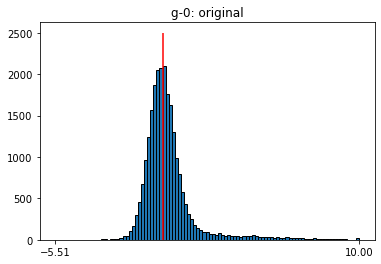

In [19]:
values = list(df['g-0'])
bins = list(np.linspace(min(values),max(values),100))
plt.hist(values, bins=bins, edgecolor='k')
plt.vlines(0, 0, 2500, colors = 'r')
plt.xticks([min(values),max(values)])
plt.title('g-0: original')
plt.show()

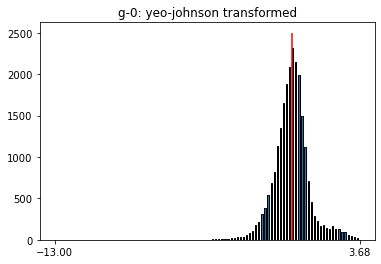

In [20]:
t_vals = stats.yeojohnson(values)
bins = np.linspace(np.min(t_vals[0]),np.max(t_vals[0]),100)
plt.hist(t_vals, bins=bins, edgecolor='k')
plt.vlines(0, 0, 2500, colors = 'r')
plt.xticks([np.min(t_vals[0]),np.max(t_vals[0])])
plt.title('g-0: yeo-johnson transformed')
plt.show()

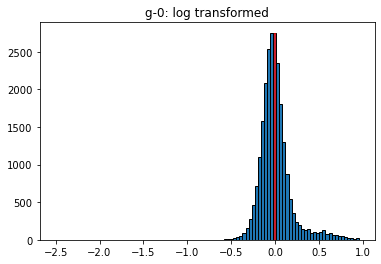

In [89]:
from statistics import mean

np_vals = np.array(values)
t_vals = list(np.log(np_vals-min(values)+0.5))
t_vals = t_vals - mean(t_vals)
bins = np.linspace(min(t_vals),max(t_vals),100)
bins = list(bins)
plt.hist(t_vals, bins=bins, edgecolor='k')
plt.vlines(0, 0, 2750, colors = 'r')
#plt.xticks(np.min(t_vals[0]),np.max(t_vals[0]))
plt.title('g-0: log transformed')
plt.show()

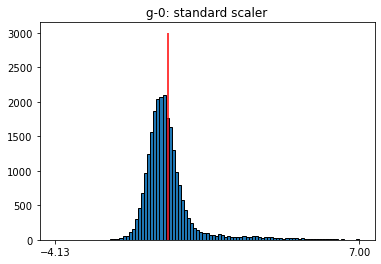

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(np.array(values).reshape(-1,1))
t_vals = scaler.transform(np.array(values).reshape(-1,1))
minimum = min(np.array(t_vals).reshape(-1,1))[0]
maximum = max(np.array(t_vals.reshape(-1,1)))[0]
bins = np.linspace(minimum,maximum,100)
bins = list(bins)
plt.hist(t_vals, bins=bins, edgecolor='k')
plt.vlines(0, 0, 3000, colors = 'r')
plt.xticks([minimum,maximum])
plt.title('g-0: standard scaler')
plt.show()

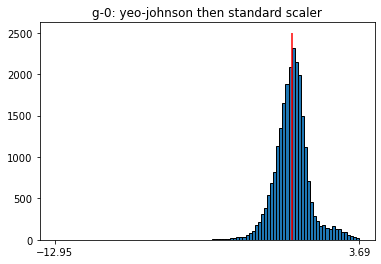

In [103]:
t_vals = stats.yeojohnson(values)
scaler = StandardScaler()

scaler.fit(t_vals[0].reshape(-1,1))
t_vals = scaler.transform(t_vals[0].reshape(-1,1))

minimum = min(t_vals.reshape(-1,1))[0]
maximum = max(t_vals.reshape(-1,1))[0]

bins = np.linspace(minimum,maximum,100)
bins = list(bins)

plt.hist(t_vals, bins=bins, edgecolor='k')
plt.vlines(0, 0, 2500, colors = 'r')
plt.xticks([minimum,maximum])
plt.title('g-0: yeo-johnson then standard scaler')
plt.show()